In [1]:
#BATUHAN CAKIR 090190164
from HW22SupportVectorMachine import SupportVectorMachine,SVM
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#data road, for import
agac_yolu = glob.glob('C:/Users/BATUHAN/Desktop/gri_kaynak/dataset/agac/*')
top_yolu  = glob.glob('C:/Users/BATUHAN/Desktop/gri_kaynak/dataset/top/*')

In [3]:
def gorseli_matrixe_atma(path):
    column_no = 0
    sifirlar = np.zeros((10000,500))
    while True:
        if column_no ==len(path):
            break
        image = Image.open(path[column_no]).convert('L')
        img_transpose = np.ravel(image).T
        sifirlar[:,column_no] = img_transpose
        column_no +=1
    return sifirlar

In [4]:
agac_veri = gorseli_matrixe_atma(agac_yolu)
top_veri = gorseli_matrixe_atma(top_yolu)
print(agac_veri.shape, "= x_data shape")
print(top_veri.shape, "= y_data shape")

(10000, 500) = x_data shape
(10000, 500) = y_data shape


In [5]:
# seperating image data train and test, and flattening
agac_train = agac_veri[:,0:450].T/255.0
agac_test  = agac_veri[:,450:].T/255.0
top_train  = top_veri[:,0:450].T/255.0
top_test   = top_veri[:,450:].T/255.0

In [6]:
print(" Number of training examples--> {}\n".format(agac_train.shape[0]+top_train.shape[0]),
"Number of testing examples---> {}\n".format(agac_test.shape[0]+top_test.shape[0]))

 Number of training examples--> 900
 Number of testing examples---> 100



In [7]:
#Support Vector Machine
#Y = Y*2 - 1 # 0->1 --> -1->1
tmp = np.array([top_train[n][0] for n in range(len(top_train))])
top_train = tmp
#Yt = Yt*2 -1 
tmp = np.array([top_test[n][0] for n in range(len(top_test))])
top_test = tmp

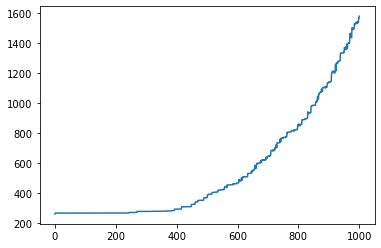

In [16]:
supVecM = SupportVectorMachine()
supVecM.train(agac_train,top_train,lambda_p=0.1,learning_rate=0.05,epochs=1000)
weights,bias,losses = supVecM.w,supVecM.b,supVecM.losses
pltX = np.linspace(0,len(supVecM.losses),len(supVecM.losses))
pltY = np.array(supVecM.losses)
plt.plot(pltX,pltY)
plt.show()

In [17]:
svm = SVM(lambda_param=0.01, learning_rate=0.05, n_iters=1000)
svm.fit(agac_train,top_train)
weights, bias, losses =  svm.w,svm.b,svm.losses
preds = svm.predict(agac_train)

In [18]:
faults = 0
for i in range(len(preds)):
    if preds[i] != top_train[i]:
        faults += 1
acc = 1 - faults/len(agac_train)
print(f"acc= {acc*100} % \n")
print(f"weights:{weights}\n\nbias:{bias}\n\nloss:{losses}")

acc= 71.11111111111111 % 

weights:[0.05350303 0.05185265 0.05062196 ... 0.03736173 0.03769393 0.03898007]

bias:-14.600000000000072

loss:[450.0637588  450.09523476 450.11675562 450.1335038  450.18474672
 450.15820851 450.10662552 450.1189944  450.10162415 450.13122216
 450.13839931 450.11387318 450.07975946 450.15148972 450.10722724
 450.12607544 450.1842703  450.16101525 450.1104239  450.12210703
 450.103809   450.13229341 450.13924113 450.11460569 450.08001014
 450.15171623 450.10739178 450.1261851  450.18425359 450.16106912
 450.11045776 450.12212786 450.09978608 450.17378108 450.11878902
 450.13487327 450.13922661 450.14856105 450.12251605 450.14236276
 450.14715412 450.14672773 450.15534895 450.12656753 450.14484611
 450.14913211 450.12108772 450.08294087 450.1538789  450.10811458
 450.12698311 450.18467373 450.16120085 450.11048552 450.12222242
 450.09986732 450.17383483 450.1188066  450.13489417 450.13924217
 450.14857296 450.12252369 450.14236686 450.14715724 450.12004488
 45

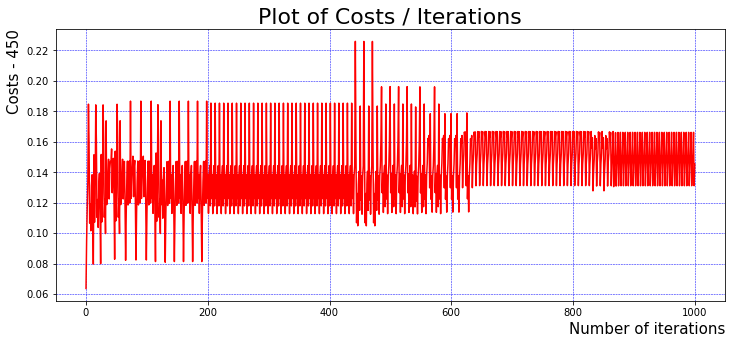

In [19]:
pltX = np.linspace(0,len(losses),len(losses)) #number of iterations
pltY = np.array(losses-450)
plt.figure(figsize=(12,5))
plt.title('Plot of Costs / Iterations', fontsize=22)
plt.ylabel("Costs - 450", fontsize=15, loc="top")
plt.xlabel("Number of iterations", fontsize=15, loc="right")
plt.plot(pltX,pltY, color='red')
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()